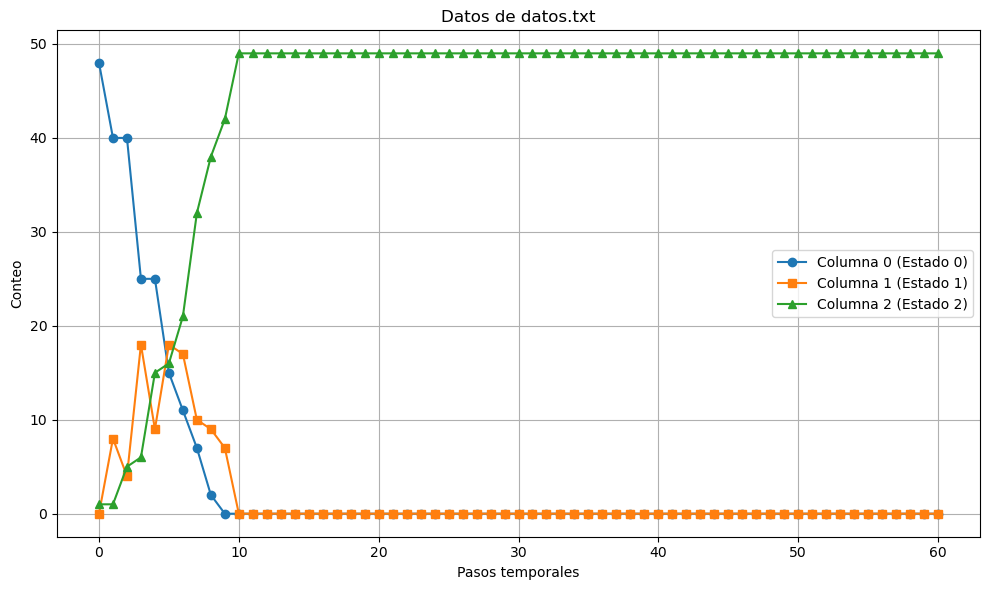

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar los datos desde un archivo .txt
def cargar_datos(nombre_archivo):
    """
    Carga un archivo de texto con tres columnas de datos.
    Retorna las columnas como arrays separados.
    """
    datos = np.loadtxt(nombre_archivo)
    columna_0 = datos[:, 0]
    columna_1 = datos[:, 1]
    columna_2 = datos[:, 2]
    return columna_0, columna_1, columna_2

# Función para graficar las tres columnas
def graficar_datos(columna_0, columna_1, columna_2, nombre_archivo):
    """
    Genera un gráfico de las tres columnas de datos.
    """
    x = np.arange(len(columna_0))  # Índices para el eje x (número de pasos temporales)
    
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    # Graficar las columnas
    plt.plot(x, columna_0, label='Columna 0 (Estado 0)', marker='o')
    plt.plot(x, columna_1, label='Columna 1 (Estado 1)', marker='s')
    plt.plot(x, columna_2, label='Columna 2 (Estado 2)', marker='^')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_archivo}")
    plt.xlabel("Pasos temporales")
    plt.ylabel("Conteo")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Nombre del archivo .txt (asegúrate de reemplazarlo con el nombre correcto)
nombre_archivo = "datos.txt"

# Cargar los datos del archivo
try:
    columna_0, columna_1, columna_2 = cargar_datos(nombre_archivo)

    # Graficar los datos
    graficar_datos(columna_0, columna_1, columna_2, nombre_archivo)

except Exception as e:
    print(f"Error al cargar o procesar el archivo: {e}")

Datos cargados:
   L   P1    P2  t_int
0  9  0.0  0.00    100
1  9  0.0  0.05    100
2  9  0.0  0.10    100
3  9  0.0  0.15    100
4  9  0.0  0.20    100

Descripción estadística:
                  L            P1            P2         t_int
count  11466.000000  11466.000000  11466.000000  11466.000000
mean      34.000000      0.500000      0.500000     45.217687
std       15.000654      0.302778      0.302778     30.602068
min        9.000000      0.000000      0.000000      5.000000
25%       21.000000      0.250000      0.250000     22.000000
50%       34.000000      0.500000      0.500000     36.000000
75%       47.000000      0.750000      0.750000     60.000000
max       59.000000      1.000000      1.000000    100.000000


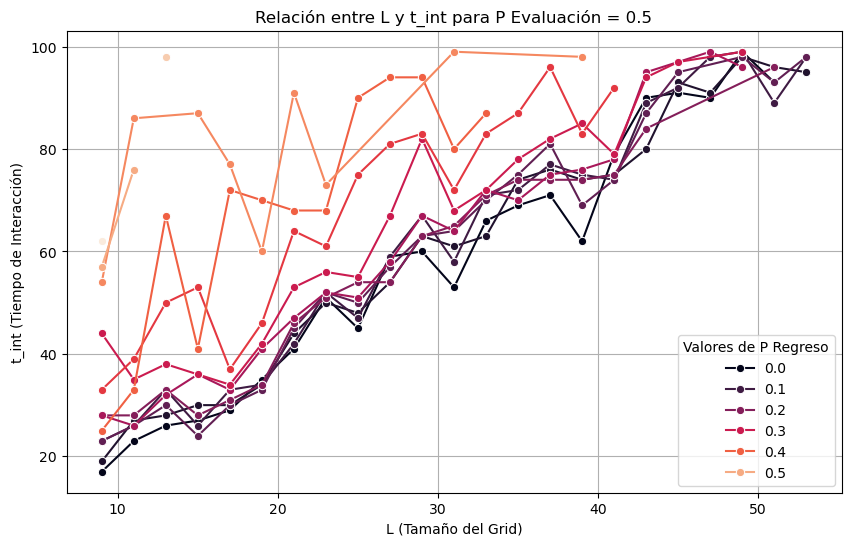

In [50]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo txt
file_name = "datos_t_inter.txt"

data = pd.read_csv(file_name, delim_whitespace=True, header=None)
data.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas


# Vista previa de los datos
print("Datos cargados:")
print(data.head())

# Análisis básico
print("\nDescripción estadística:")
print(data.describe())

# Gráficos de análisis
filtered_data = data[((data["P1"] == 0.1)& (data["t_int"] != 100))]

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x="L", y="t_int", hue="P2", marker="o", palette="rocket")
plt.title("Relación entre L y t_int para P Evaluación = 0.5")
plt.xlabel("L (Tamaño del Grid)")
plt.ylabel("t_int (Tiempo de Interacción)")
plt.grid()
plt.legend(title="Valores de P Regreso")
plt.show()



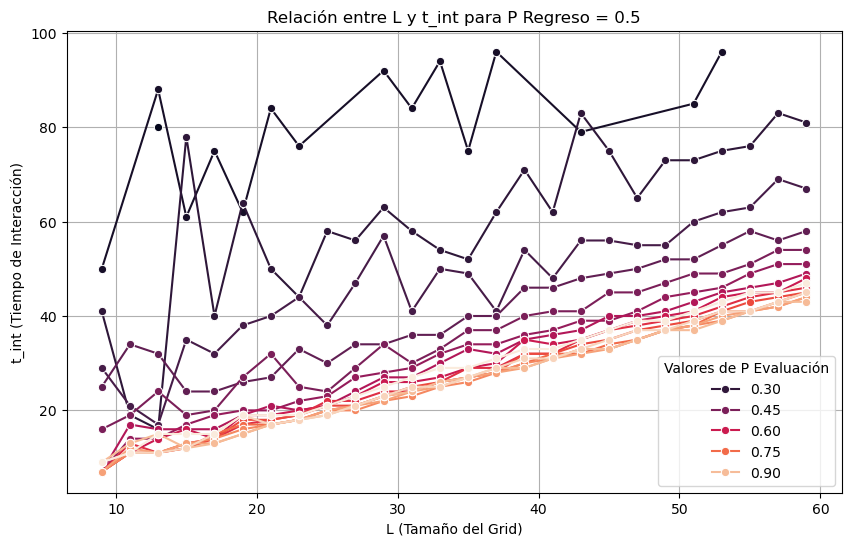

In [51]:
# Gráficos de análisis
filtered_data = data[((data["P2"] == 0.8)&( data["t_int"] != 100))]

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x="L", y="t_int", hue="P1", marker="o", palette="rocket")
plt.title("Relación entre L y t_int para P Regreso = 0.5")
plt.xlabel("L (Tamaño del Grid)")
plt.ylabel("t_int (Tiempo de Interacción)")
plt.grid()
plt.legend(title="Valores de P Evaluación")
plt.show()

      L    P1    P2  t_int
462  11  0.05  0.00     44
463  11  0.05  0.05     41
464  11  0.05  0.10     48
465  11  0.05  0.15     61
466  11  0.05  0.20     71


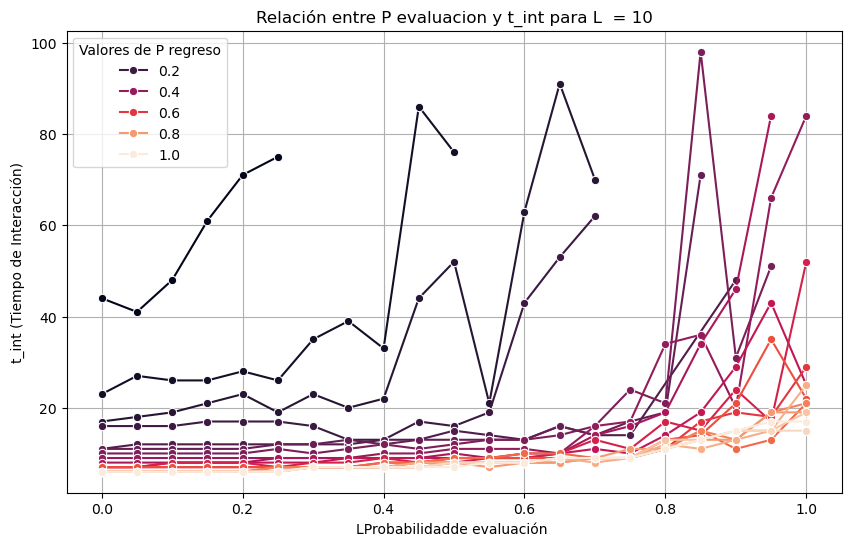

In [52]:
# Gráficos de análisis
filtered_data = data[((data["L"] == 11 )& (data["t_int"] != 100))]
print(filtered_data.head())
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x="P2", y="t_int", hue="P1", marker="o", palette="rocket")
plt.title("Relación entre P evaluacion y t_int para L  = 10")
plt.xlabel("LProbabilidadde evaluación ")
plt.ylabel("t_int (Tiempo de Interacción)")
plt.grid()
plt.legend(title="Valores de P regreso")
plt.show()